In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas_datareader.data as web
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [2]:
style.use('ggplot')
start = dt.datetime(2010,1,1)
end = dt.datetime.now()

In [3]:
def stock_info(stock):
    stock_ = web.DataReader(stock,'yahoo',start,end)
    stock_['Price'] = stock_['Close'].shift(-1)
    stock_['PriceDiff'] = stock_['Price'] - stock_['Close']
    stock_['Return'] = stock_['PriceDiff']/stock_['Close']
    stock_['Direction'] = [1 if stock_.loc[ei,'PriceDiff']>0
                    else -1 for ei in stock_.index]
    stock_['MA10'] = stock_['Close'].rolling(10).mean()
    stock_['MA20'] = stock_['Close'].rolling(20).mean()
    stock_['MA50'] = stock_['Close'].rolling(50).mean()
    stock_['MA100'] = stock_['Close'].rolling(100).mean()
    stock_['Strategy'] = [1 if (stock_.loc[ei,'MA10']> stock_.loc[ei,'MA20']
                    and stock_.loc[ei,'MA50']> stock_.loc[ei,'MA100'])
                   else 0 for ei in stock_.index]
    stock_['Profit'] = [stock_.loc[ei,'Price']-stock_.loc[ei,'Close'] if stock_.loc[ei,'Strategy']==1 else 0 
               for ei in stock_.index]
    stock_['Wealth'] = stock_['Profit'].cumsum()
    stock_ = stock_.dropna()
    return stock_
    return stock_.shape

stock_info('tsla')

,High,Low,Open,Close,Volume,Adj Close,Price,PriceDiff,Return,Direction,MA10,MA20,MA50,MA100,Strategy,Profit,Wealth
Date,,,,,,,,,,,,,,,,,
2010-11-17,6.150000,5.722000,6.040000,5.898000,3750000.0,5.898000,5.978000,0.080000,0.013564,1,5.523000,4.882900,4.428440,4.197580,1,0.080000,0.080000
2010-11-18,6.148000,5.784000,6.134000,5.978000,4780500.0,5.978000,6.198000,0.220000,0.036802,1,5.622800,4.974300,4.465160,4.209580,1,0.220000,0.300000
2010-11-19,6.274000,5.940000,6.032000,6.198000,5752500.0,6.198000,6.680000,0.482000,0.077767,1,5.753800,5.077000,4.508440,4.223900,1,0.482000,0.782000
2010-11-22,6.690000,6.300000,6.314000,6.680000,7648500.0,6.680000,6.914000,0.234000,0.035030,1,5.922200,5.202500,4.559160,4.246780,1,0.234000,1.016000
2010-11-23,7.136000,6.438000,6.658000,6.914000,7889000.0,6.914000,7.094000,0.180000,0.026034,1,6.121000,5.334600,4.612960,4.277520,1,0.180000,1.196000
2010-11-24,7.194000,6.866000,7.054000,7.094000,7125000.0,7.094000,7.064000,-0.030000,-0.004229,-1,6.243200,5.479300,4.666920,4.316240,1,-0.030000,1.166000
2010-11-26,7.200000,6.950000,7.120000,7.064000,1753000.0,7.064000,6.866000,-0.198000,-0.028029,-1,6.388800,5.620600,4.724440,4.355280,1,-0.198000,0.968000
2010-11-29,7.190000,6.666000,7.082000,6.866000,5728000.0,6.866000,7.066000,0.200000,0.029129,1,6.478600,5.745500,4.780840,4.389020,1,0.200000,1.168000
2010-11-30,7.066000,6.682000,6.748000,7.066000,11113000.0,7.066000,6.870000,-0.196000,-0.027738,-1,6.569200,5.884700,4.837920,4.424880,1,-0.196000,0.972000


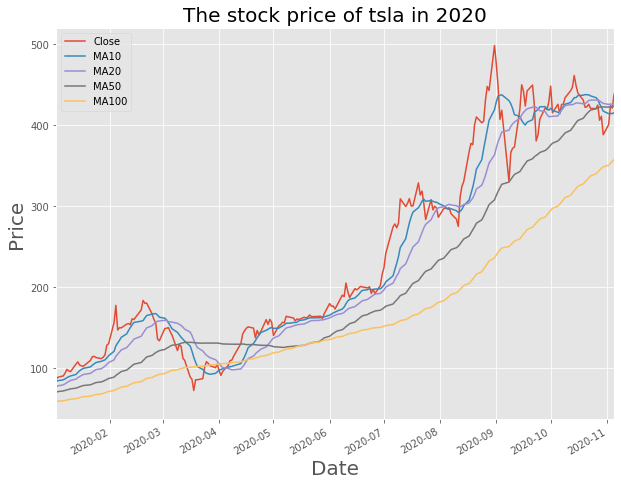

In [4]:
def stock_plot(stock,date):
    stock_ = stock_info(stock)
    plt.figure(figsize = (10,8))
    stock_.loc['2020-01-01':date, 'Close'].plot(label = 'Close')
    stock_.loc['2020-01-01':date, 'MA10'].plot(label = 'MA10')
    stock_.loc['2020-01-01':date, 'MA20'].plot(label = 'MA20')
    stock_.loc['2020-01-01':date, 'MA50'].plot(label = 'MA50')
    stock_.loc['2020-01-01':date, 'MA100'].plot(label = 'MA100')
    plt.title(f'The stock price of {stock} in 2020',  size = 20)
    plt.xlabel('Date', size = 20)
    plt.ylabel('Price',  size = 20)
    plt.legend(loc = 'best')
    plt.show()
    
stock_plot('tsla','2020-11-06')

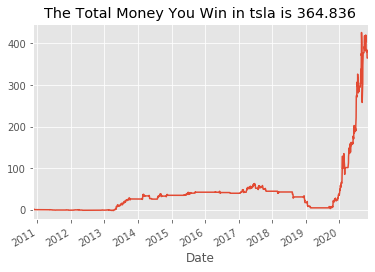

In [5]:
def strategy_plot(stock):
    stock_ = stock_info(stock)
    stock_['Wealth'].plot()
    plt.title(f"The Total Money You Win in {stock} is {stock_.loc[stock_.index[-2],'Wealth'].round(3)}")
    
strategy_plot('tsla')

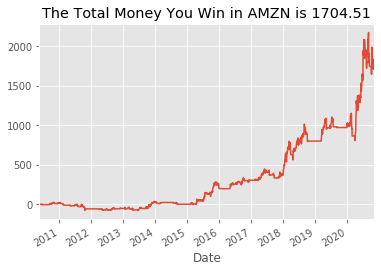

In [6]:
strategy_plot('AMZN')

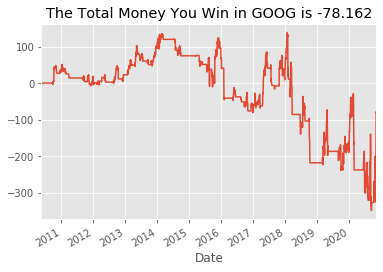

In [8]:
strategy_plot('GOOG')

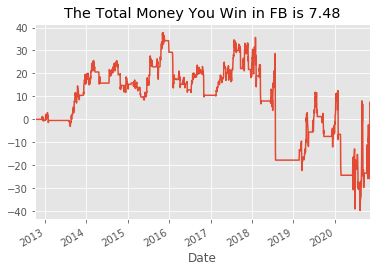

In [9]:
strategy_plot('FB')

In [10]:
def stock_info2(stock):
    stock_ = stock_info(stock)
    global future_day
    future_day = 100
    stock_['Prediction'] = stock_['Close'].shift(-future_day)
    new_df = stock_[['Close','Prediction']]
    return (new_df)

stock_info2('tsla')

,Close,Prediction
Date,,
2010-11-17,5.898000,4.930
2010-11-18,5.978000,4.986
2010-11-19,6.198000,5.028
2010-11-22,6.680000,5.116
2010-11-23,6.914000,5.006
2010-11-24,7.094000,5.032
2010-11-26,7.064000,5.150
2010-11-29,6.866000,5.348
2010-11-30,7.066000,5.278


the training accuracy: 0.96996539766711
the testing accuracy: 0.8136046945967637


/Users/stephentang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


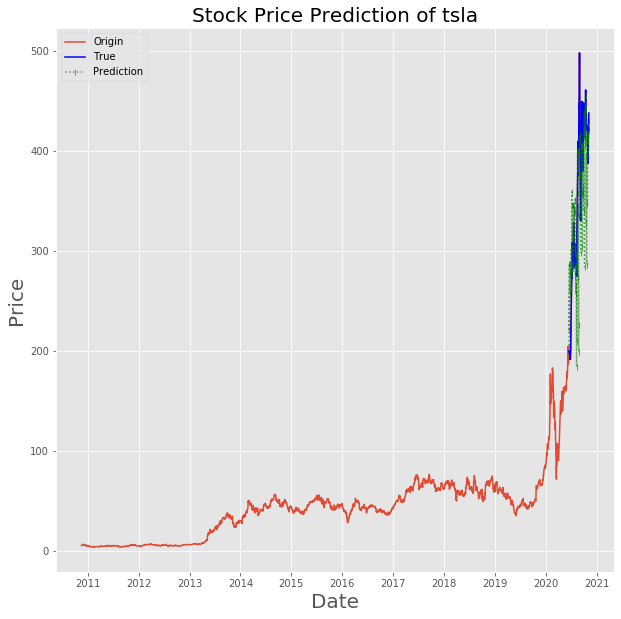

In [11]:
def model_prediction_plot(stock):
    
    stock_ = stock_info2(stock)
    global feature, target
    feature = np.array(stock_.drop(['Prediction'],1))[:-future_day]
    target = np.array(stock_['Prediction'])[:-future_day]

    X_train, X_test, y_train, y_test = train_test_split(feature,target,test_size = 0.2, random_state = 0)
    x_future = stock_.drop(['Prediction'],1)[:-future_day]
    x_future = x_future.tail(future_day)
    x_future = np.array(x_future)
    
    forest = RandomForestRegressor(n_estimators = 100, random_state = 10)
    forest.fit(X_train,y_train)
    print(f'the training accuracy: {forest.score(X_train,y_train)}')
    print(f'the testing accuracy: {forest.score(X_test,y_test)}')
    tree_prediction = forest.predict(x_future)
    
    true = stock_[feature.shape[0]:]
    true['Prediction'] = tree_prediction
    plt.figure(figsize = (10,10))
    plt.plot(stock_['Close'])
    plt.plot(true['Close'], color = 'blue')
    plt.plot(true['Prediction'], color = 'green', linestyle=':', marker='|', alpha = 0.65)
    plt.title(f'Stock Price Prediction of {stock}',size = 20)
    plt.xlabel('Date',size = 20)
    plt.ylabel('Price',size = 20)
    plt.legend(['Origin', 'True', 'Prediction'], loc = 'best')
    plt.show()

model_prediction_plot('tsla')

the training accuracy: 0.96996539766711
the testing accuracy: 0.8136046945967637


/Users/stephentang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


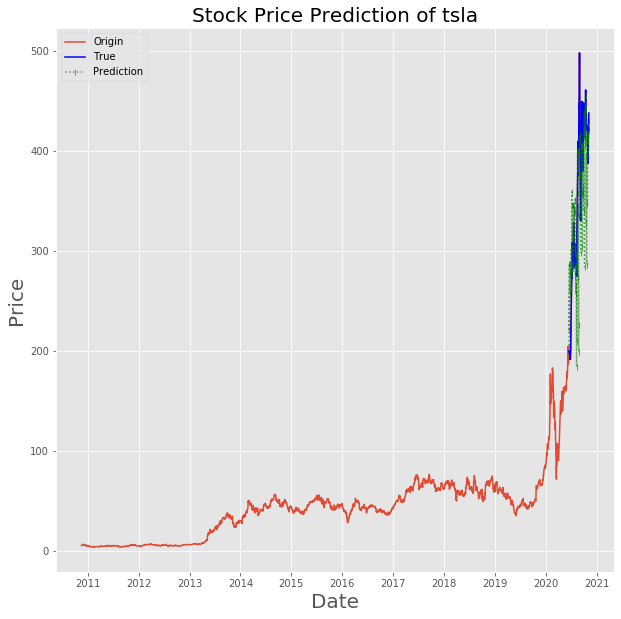

the final model accuracy: 0.9703240449871194


In [12]:
def final_model(stock):
    stock_ = stock_info2(stock)
    model_prediction_plot(stock)
    final_forest = RandomForestRegressor(n_estimators = 100,random_state = 66)
    final_forest.fit(feature,target)
    print(f'the final model accuracy: {final_forest.score(feature,target)}')
    
final_model('tsla')